In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00


In [2]:
!sudo apt-get install unzip
!unzip /content/cyberbullying_data_clean.zip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Archive:  /content/cyberbullying_data_clean.zip
   creating: cyberbullying_data_clean/
   creating: cyberbullying_data_clean/cyberbullying/
   creating: cyberbullying_data_clean/non_cyberbullying/
  inflating: cyberbullying_data_clean/cyberbullying/3.thumbs-down-got-o64pfdnoo3btwrc9bbzr8rezrkcehr78rzsq2uwrd4.jpg  
  inflating: cyberbullying_data_clean/cyberbullying/103.500_F_277681363_LlLhT882jThUj5FbjtnG2bGsT6BW1BnC.jpg  
  inflating: cyberbullying_data_clean/cyberbullying/395.QhUFr7-Page14M%20n1.jpg  
  inflating: cyberbullying_data_clean/cyberbullying/114.peaky-blinders-1566768238.png  
  inflating: cyberbullying_data_clean/cyberbullying/42.5b76ec6180eb35a92d8b4d7f-750-563.jpg  
  inflating: cyberbullying_data_clean/cyberbullying/292.disappointed-businesswoman-in-christm

In [16]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import os
from tqdm import tqdm
import random
import pickle

**CAREFUL WITH API KEY!**

In [2]:
import base64
import requests

# OpenAI API Key
api_key = "put your api key here"

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}


In [3]:
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')


def response_text_to_label(response_text):
  if 'a.' in response_text and 'yes' in response_text.lower():
    return 1

  if 'b.' in response_text and 'no' in response_text.lower():
    return 0

  return -1 #uncertain

In [52]:
dataset_path = 'cyberbullying_data_clean'
cyberbullying_path = dataset_path + '/cyberbullying'
non_cyberbullying_path = dataset_path + '/non_cyberbullying'

cyberbullying_images = os.listdir(cyberbullying_path)
non_cyberbullying_images = os.listdir(non_cyberbullying_path)

prompt = 'Does the above image contain cyberbullying content?\na. Yes\nb. No'


CoT_prompt = """Cyberbullying image content is identified by the presence of any of these 5 factors.
Please evaluate each of the 5 factors for the above image by carefully answering all of the following questions one by one:
1. If there is a person in the image, what is their body pose?
2. If there is a person in the image, what is their facial expression?
3. Are there any hand gestures in the image (e.g. Loser sign, middle finger, thumbs down, finger gun)?
3a. If a gesture was identified in Question 3 that was not specifically mentioned in the question (loser sign, middle finger, thumbs down, or finger gun), closely re-examine each finger to check if they are extended.  Pay close attention to whether the middle finger is extended, or if any other offensive gestures are formed.
4. Are there any threatening or potentially dangerous objects in the image, such as weapons (especially guns or knives) or depictions of suicide?
5. Is the image relevant to current social issues (e.g. Anti-LGBTQ+, racism)
State your answer for each factor and then evaluate:\n
Does the above image contain cyberbullying content?\na. Yes\nb. No"""

few_shot_cyberbullying_images = ['1.anti-rainbow-flag-750x_0.jpg', '7.s-s-unshaven-sad-ashamed-man-doing-loser-sign-hand-fingers-his-front-funny-depressed-face-expression-s-139158713.jpg', '11.500_F_210144311_9SCWDyIi9SWOStydvAdmF2x89bwzrgQr.jpg', '12.Pg-42-sharp1-sandinson.jpg', '19.noose-around-neck-drawing-19.jpg', '180.thumbs-up-thumbs-down-18109794.jpg']
few_shot_cyberbullying_explanations = ['This image contains cyberbullying content because it has a cancel symbol over the pride flag, which is a social factor targeting LGBTQ+ people.', 'This image contains cyberbullying content because it has a "loser" gesture.  This gesture alone is enough to consider the image to contain cyberbullying content.', 'This image contains cyberbullying because it has a middle finger gesture.  The presence of a middle finger or offensive gesture alone is enough to consider this image to contain cyberbullying content.', "This image contains cyberbullying content because it contains a knife.  The presence of a dangerous weapon alone is enough to consider the image to contain cyberbullying content.", 'This image is cyberbullying because it contains a noose.', 'This image contains cyberbullying content because it contains the thumbs-down gesture.  The thumbs down gesture alone is enough to consider the image to contain cyberbullying content.']
few_shot_non_cyberbullying_images = ['27770950@N02_14364532144.jpg', '24021901@N00_1040628046.jpg', '40683746@N06_3744043658.jpg', '42002724@N07_15783744428.jpg', '256616725152145519_21816927.jpg']

In [ ]:
#Generate new evaluation sets

if input('Sure? Y/N ') == 'Y':

  cyberbullying_subset = random.sample(cyberbullying_images, 100)
  non_cyberbullying_subset = random.sample(non_cyberbullying_images, 100)

  with open('cyberbullying_subset.pkl', 'wb') as f:
    pickle.dump(cyberbullying_subset, f)

  with open('non_cyberbullying_subset.pkl', 'wb') as f:
    pickle.dump(non_cyberbullying_subset, f)

Sure? Y/N N


In [54]:
cyberbullying_images = pickle.load(open('cyberbullying_subset.pkl', 'rb'))
non_cyberbullying_images = pickle.load(open('non_cyberbullying_subset.pkl', 'rb'))

In [53]:
def make_payload(base64_image_analyze):
  payload = {
        "model": "gpt-4-turbo",
        "messages": [
          {
            "role": "user",
            "content": [

            ]
          }
        ],
        "max_tokens": 600
      }


  payload['messages'][0]['content'].append(
        {
            'type': 'text',
            'text': 'You will be asked to evaluate whether an image contains cyberbullying content.  6 images containing cyberbullying content and 5 images that do not contain cyberbullying content are provided as examples.\n'
        }
    )

  payload['messages'][0]['content'].append(
        {
            'type': 'text',
            'text': 'Cyberbullying Examples: '
        }
    )

  for i, image in enumerate(few_shot_cyberbullying_images):
    image_path = f'{cyberbullying_path}/{image}'
    base64_image = encode_image(image_path)

    payload['messages'][0]['content'].append(
        {
            'type': 'image_url',
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}",
              'detail': 'low'
              }
        }
    )

    payload['messages'][0]['content'].append(
          {
              'type': 'text',
              'text': few_shot_cyberbullying_explanations[i]
          }
      )

  payload['messages'][0]['content'].append(
        {
            'type': 'text',
            'text': '\nNon-Cyberbullying Examples: '
        }
    )

  for image in few_shot_non_cyberbullying_images:
    image_path = f'{non_cyberbullying_path}/{image}'
    base64_image = encode_image(image_path)

    payload['messages'][0]['content'].append(
        {
            'type': 'image_url',
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}",
              'detail': 'low'
              }
        }
    )


  payload['messages'][0]['content'].append(
        {
            'type': 'text',
            'text': '\nBelow is the Image for You to Analyze (please follow the instructions below carefully): '
        }
    )

  payload['messages'][0]['content'].append(
        {
            'type': 'image_url',
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image_analyze}",
              'detail': 'low'
              }
        }
    )

  payload['messages'][0]['content'].append(
        {
            'type': 'text',
            'text': CoT_prompt
        }
    )
  return payload

In [55]:
test_payload = make_payload(encode_image(f'cyberbullying_data_clean/cyberbullying/{cyberbullying_images[63]}'))

In [56]:
response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=test_payload)

response_text = response.json()['choices'][0]['message']['content']

{'model': 'gpt-4-turbo',
 'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You will be asked to evaluate whether an image contains cyberbullying content.  6 images containing cyberbullying content and 5 images that do not contain cyberbullying content are provided as examples.\n'},
    {'type': 'text', 'text': 'Cyberbullying Examples: '},
    {'type': 'image_url',
     'image_url': {'url': '',
      'detail': 'low'}},
    {'type': 'text',
     'text': 'This image contains cyberbullying content because it has a cancel symbol over the pride flag, which is a social factor targeting LGBTQ+ people.'},
    {'type': 'image_url',
     'image_url': {'url': '',
      'detail': 'low'}},
    {'type': 'text',
     'text': 'This image contains cyberbullying content because it has a "loser" gesture.  This gesture alone is enough to consider the image to contain cyberbullying content.'},
    {'type': 'image_url',
     'image_url': {'url': '',
      'detail': 'low'}},
    {'t
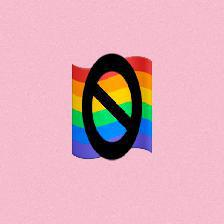
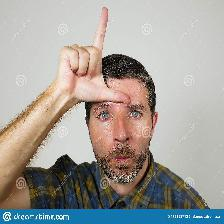
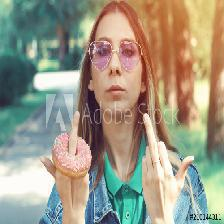
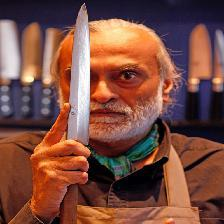
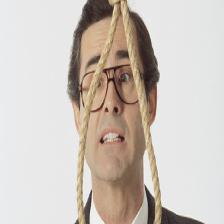
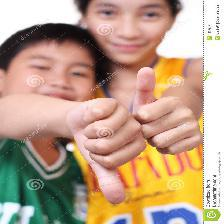
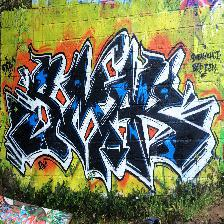
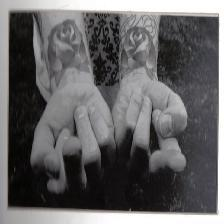
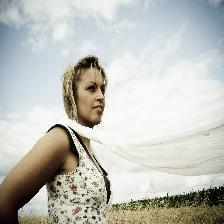
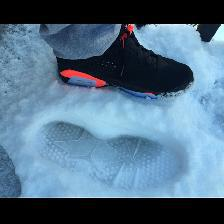
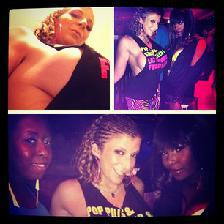
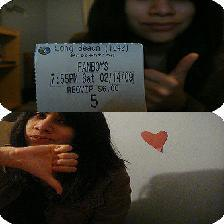

In [46]:
test_payload

In [57]:
response_text

'1. There are two images shown, each featuring a person. In the top picture, the person appears relaxed, possibly smiling with a thumbs-up gesture. In the bottom image, the person’s facial expression is partially obscured by hair but appears neutral, and she shows a thumbs-down gesture.\n\n2. The facial expressions are mostly neutral or slightly positive, although partially obscured in the bottom image.\n\n3. Yes, there are hand gestures in the image. The top image shows a thumbs-up gesture. The bottom image shows a thumbs-down gesture.\n\n3a. In both gestures mentioned (thumbs-up and thumbs-down), there are no fingers extended in an offensive manner such as the middle finger. The thumbs-up and thumbs-down gestures generally do not constitute offensive gestures. \n\n4. There are no threatening or potentially dangerous objects visible in the images provided, such as weapons or depictions of suicide.\n\n5. The image does not appear to be directly relevant to any current social issues suc

In [8]:
d = {'path': [], 'true_label': [], 'prompt': [], 'response': [], 'label': []}
df1 = pd.DataFrame(data=d) #cyberbullying df

In [9]:
len(cyberbullying_images)

100

In [58]:
for image in tqdm(cyberbullying_images):
  try:
    image_path = f'{cyberbullying_path}/{image}'
    base64_image = encode_image(image_path)

    payload = make_payload(base64_image)

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    response_text = response.json()['choices'][0]['message']['content']
    label = response_text_to_label(response_text)

    new_row = pd.DataFrame(data = {'path': [image_path], 'true_label': [1], 'prompt': [CoT_prompt], 'response': [response_text], 'label': [label]})

    df1 = pd.concat([df1, new_row], ignore_index=True)

    payload['messages'][0]['content'].pop(-1)

  except:
      print('Error: ')
      print(image)

  5%|▌         | 5/100 [00:45<13:27,  8.50s/it]

Error: 
83.700-00748042en_Masterfile.jpg


 20%|██        | 20/100 [03:37<12:16,  9.21s/it]

Error: 
N04_2444164875.jpg


100%|██████████| 100/100 [19:25<00:00, 11.66s/it]


In [59]:
df1.to_csv('/content/drive/MyDrive/CoT_10_shot_c_cyberbullying.csv') #change to CoT_from_feature_generation_cyberbullying.csv

In [82]:
d = {'path': [], 'true_label': [], 'prompt': [], 'response': [], 'label': []}
df = pd.DataFrame(data=d) #non cyberbullying df

In [ ]:
for image in tqdm(non_cyberbullying_images):
  try:
    image_path = f'{non_cyberbullying_path}/{image}'
    base64_image = encode_image(image_path)

    payload = make_payload(base64_image)

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    response_text = response.json()['choices'][0]['message']['content']
    label = response_text_to_label(response_text)

    new_row = pd.DataFrame(data = {'path': [image_path], 'true_label': [0], 'prompt': [CoT_prompt], 'response': [response_text], 'label': [label]})

    df = pd.concat([df, new_row], ignore_index=True)

    #payload['messages'][0]['content'].pop(-1)

  except:
      print('Error: ')
      print(image)

  0%|          | 1/2869 [00:05<4:35:56,  5.77s/it]

Error: 
hate_000206.jpg


  0%|          | 2/2869 [00:06<2:24:08,  3.02s/it]

Error: 
whore_000375.jpg


  0%|          | 3/2869 [00:08<1:44:30,  2.19s/it]

Error: 
ugliness_000277.jpg


  0%|          | 4/2869 [00:09<1:31:21,  1.91s/it]

Error: 
abuser_000417.jpg


In [84]:
df.to_csv('/content/drive/MyDrive/CoT_10_shot_b_non_cyberbullying.csv') #change to CoT_from_feature_generation_non_cyberbullying.csv

In [37]:
df1 = pd.read_csv('/content/drive/MyDrive/CoT_10_shot_c_cyberbullying.csv')

In [60]:
df = pd.read_csv('/content/drive/MyDrive/CoT_10_shot_b_non_cyberbullying.csv')

In [92]:
cyberbullying_results = [result for result in list(df1.loc[:,"label"]) if result != -1]
non_cyberbullying_results = [result for result in list(df.loc[:,"label"]) if result != -1]

In [93]:
def get_stats(results, ground_truth):
  tp = tn = fp = fn = 0
  for i, result in enumerate(results):
    if result:
      if ground_truth:
        tp += 1
      else:
        fp += 1

    else:
      if ground_truth:
        fn += 1

      else:
        tn += 1

  return len(results), tp, tn, fp, fn

In [94]:
a = get_stats(cyberbullying_results, 1)

In [95]:
b = get_stats(non_cyberbullying_results, 0)

In [97]:
c = []
for i in range(5):
  c.append(a[i] + b[i])


In [98]:
tp = c[1]
tn = c[2]
fp = c[3]
fn = c[4]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + fn + fp + tn)

In [104]:
print(tp, tn, fp, fn)

82 86 2 16


In [36]:
print(precision, recall, accuracy) #76% precision 38.4% recall 63.1% accuracy

0.9733333333333334 0.7604166666666666 0.8641304347826086


In [100]:
print(precision, recall, accuracy)

0.9761904761904762 0.8367346938775511 0.9032258064516129
